In [1]:
import csv
import numpy as np
import re
import matplotlib.pyplot as plt

regex1 = r"\d+"
regex2 = r"c\d+"
A = np.zeros((1000,10000)) #1.000x10.000 matrix

In [2]:
#load data
with open("data_train.csv") as csvfile:
	readCSV = csv.reader(csvfile,delimiter=',')
	next(readCSV) #discard header
	for row in readCSV:
		match = re.search(regex1,row[0])
		match2 = re.search(regex2,row[0])
		row_i = int(match.group(0))-1
		col_i = int(match2.group(0)[1:]) -1
		A[col_i,row_i] = int(row[1])

In [3]:
means = np.average(A, axis=1, weights=A.astype(bool))
totalmean = np.mean(means)

In [4]:
K = 25
sums = np.sum(A,axis=0)
bettermean = [(totalmean*K + sums[i])/(K+10000) for i in range(means.shape[0])]
for x in range(A.shape[0]): #x is cols
	for y in range(A.shape[1]):
		if A[x,y]==0:
			A[x,y] = means[x]

(1000,)


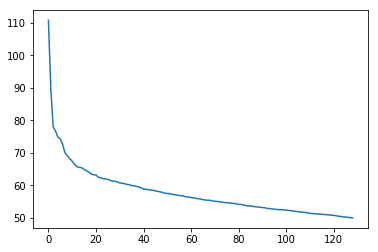

In [5]:
#SVD
U, D, V = np.linalg.svd(A, full_matrices=False)
print(D.shape)
plt.plot(D[1:130])
plt.show()

In [6]:
dim = 25
total = 1000-dim
D = np.append(D[0:dim],np.zeros((total)))

In [7]:
D = np.diag(D)

print(D.shape)

Uprime = np.dot(U,np.sqrt(D))
Vprime = np.dot(np.sqrt(D),V)

(1000, 1000)


In [8]:
print(U.shape, D.shape, V.shape)
print(Uprime.shape, Vprime.shape)
B = np.dot(U,np.dot(D,V))
print(np.isclose(A,B).all())
low_values_indices = A < 0  # Where values are low
A[low_values_indices] = 0  # All low values set to 0

(1000, 1000) (1000, 1000) (1000, 10000)
(1000, 1000) (1000, 10000)
False


In [9]:
#now lets predict the data from samplesubmission
fout = open('mysubmission.csv', 'w')
fout.write("Id,Prediction\n")
with open("SampleSubmission.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        calc = np.dot(Uprime[col_i,:],Vprime.T[row_i,:])
        A[col_i,row_i] = calc
        fout.write(row[0]+","+str(calc)+"\n")
    fout.close()